In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

In [53]:
# Read the gen1 dfset with custom date parser
gen = pd.read_csv('data/Plant_1_Generation_Data.csv', 
                   parse_dates=['DATE_TIME'], 
                   date_parser=lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))

# Read the wea1 dfset, assuming standard date format
wea = pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv', 
                   parse_dates=['DATE_TIME'],
                   date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

C:\Users\auror\AppData\Local\Temp\ipykernel_1304\4033465836.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  gen = pd.read_csv('data/Plant_1_Generation_Data.csv',
C:\Users\auror\AppData\Local\Temp\ipykernel_1304\4033465836.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  wea = pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv',


In [54]:
# Merge on DATE_TIME
data = pd.merge(gen, wea, on='DATE_TIME')


In [55]:
# Convert DATE_TIME to datetime format and extract date
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data['DATE'] = data['DATE_TIME'].dt.date

# Aggregating data by day
daily_data = data.groupby('DATE').agg({'DAILY_YIELD':'sum'}).reset_index()

# Splitting the dataset into training and test sets
test_data = daily_data.iloc[-4:]
train_data = daily_data.iloc[:-4]

# Display the first few rows of the aggregated daily data
train_data.head(), test_data


(         DATE   DAILY_YIELD
 0  2020-05-15  5.053591e+06
 1  2020-05-16  6.699905e+06
 2  2020-05-17  7.804065e+06
 3  2020-05-18  5.130290e+06
 4  2020-05-19  5.896321e+06,
           DATE   DAILY_YIELD
 30  2020-06-14  7.240643e+06
 31  2020-06-15  7.137433e+06
 32  2020-06-16  6.512585e+06
 33  2020-06-17  6.138883e+06)

In [56]:
data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17


In [57]:
data['DC_POWER'] = data['DC_POWER'] / 10

df_sample = data.sample(n=5000, random_state=42)


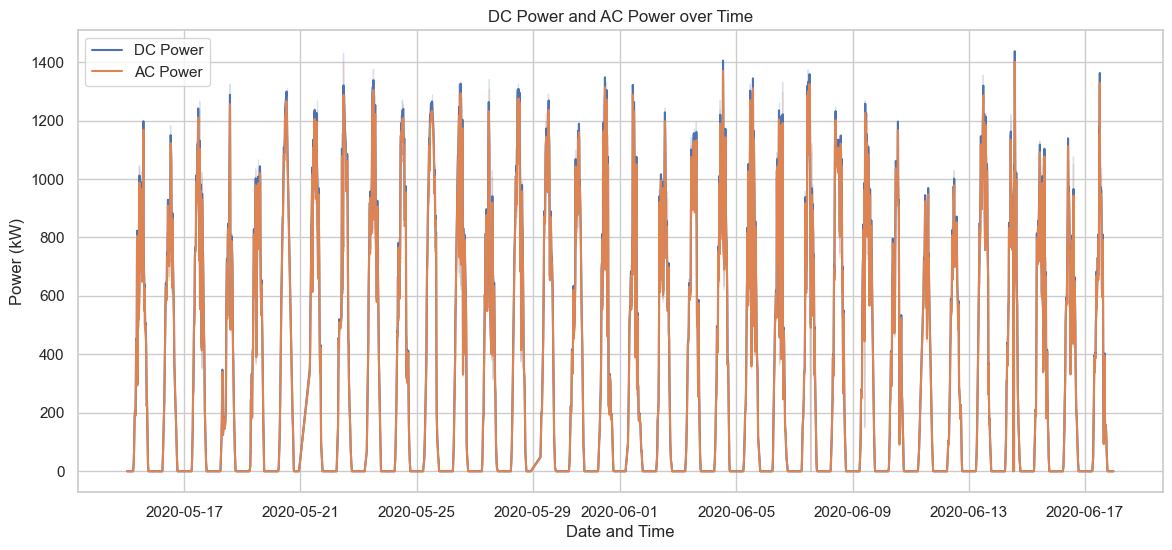

In [58]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_sample, label='DC Power')
sns.lineplot(x='DATE_TIME', y='AC_POWER', data=df_sample, label='AC Power')
plt.title('DC Power and AC Power over Time')
plt.xlabel('Date and Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

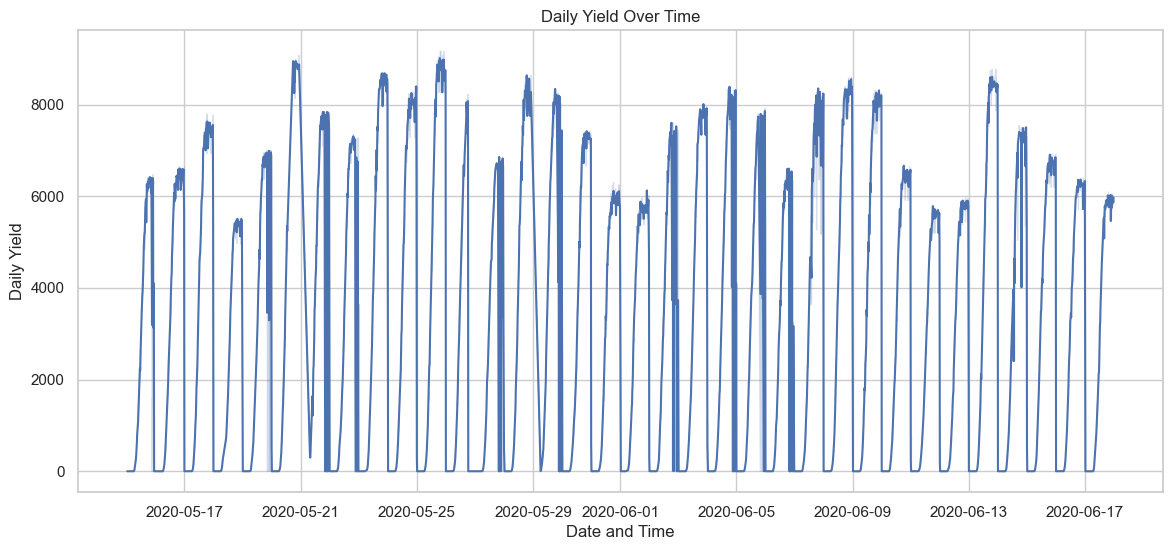

In [21]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='DATE_TIME', y='DAILY_YIELD', data=df_sample)
plt.title('Daily Yield Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Daily Yield')
plt.show()

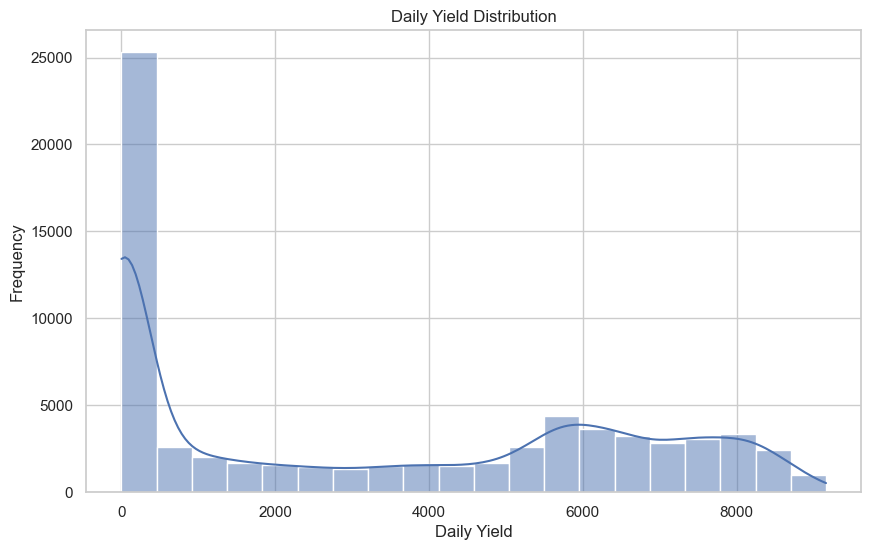

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DAILY_YIELD'], bins=20, kde=True)
plt.title('Daily Yield Distribution')
plt.xlabel('Daily Yield')
plt.ylabel('Frequency')
plt.show()

C:\Users\auror\AppData\Local\Temp\ipykernel_1304\3272403165.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DATE', y='IRRADIATION', data=data, ci=None)


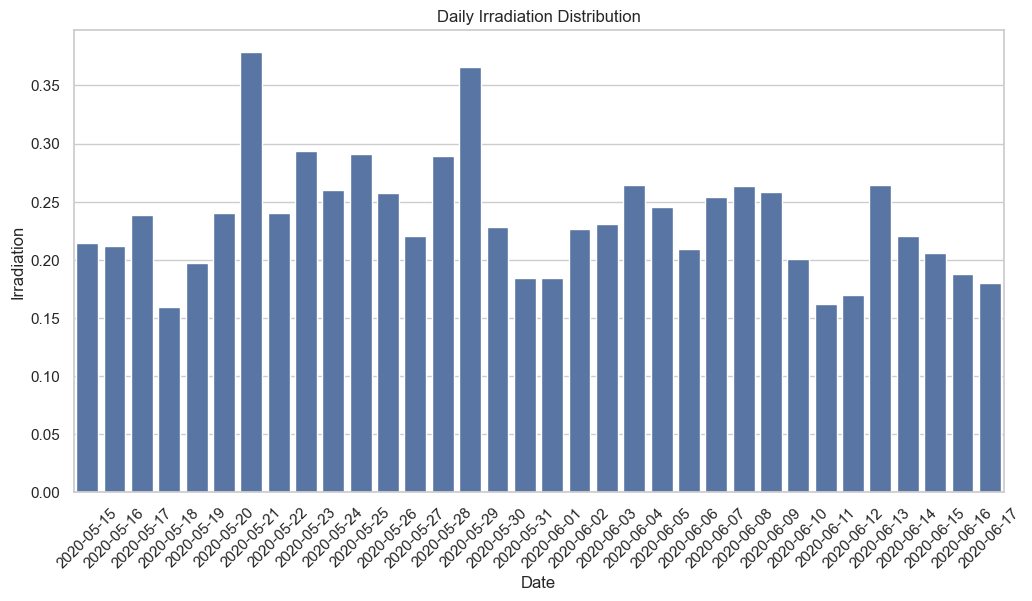

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DATE', y='IRRADIATION', data=data, ci=None)
plt.title('Daily Irradiation Distribution')
plt.xlabel('Date')
plt.ylabel('Irradiation')
plt.xticks(rotation=45)
plt.show()

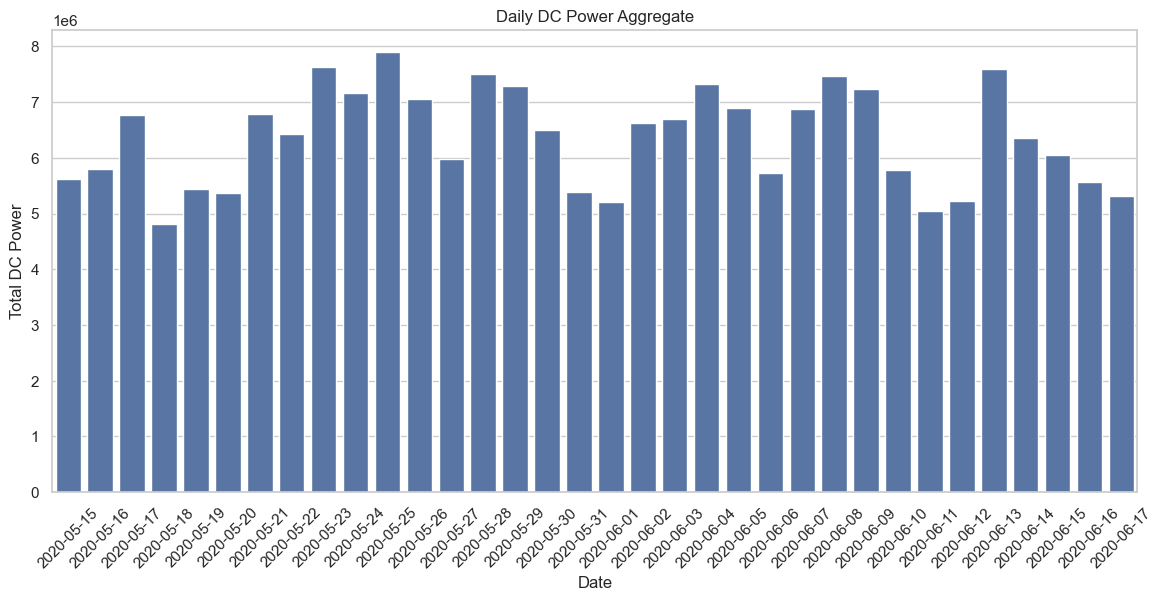

In [30]:
daily_dc_power = data.groupby('DATE')['DC_POWER'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='DATE', y='DC_POWER', data=daily_dc_power)
plt.title('Daily DC Power Aggregate')
plt.xlabel('Date')
plt.ylabel('Total DC Power')
plt.xticks(rotation=45)
plt.show()

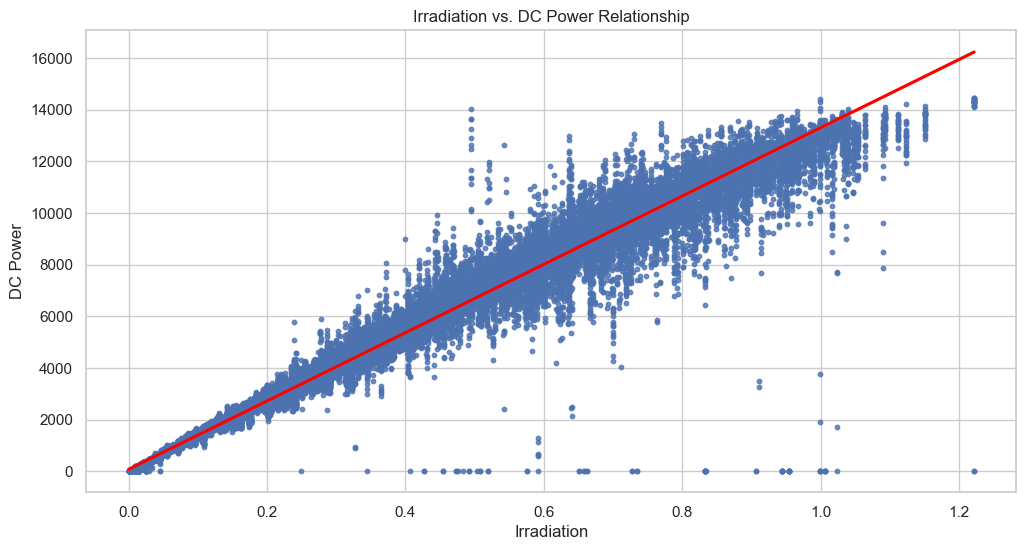

In [46]:
plt.figure(figsize=(12, 6))
sns.regplot(x='IRRADIATION', y='DC_POWER', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Irradiation vs. DC Power Relationship')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.show()

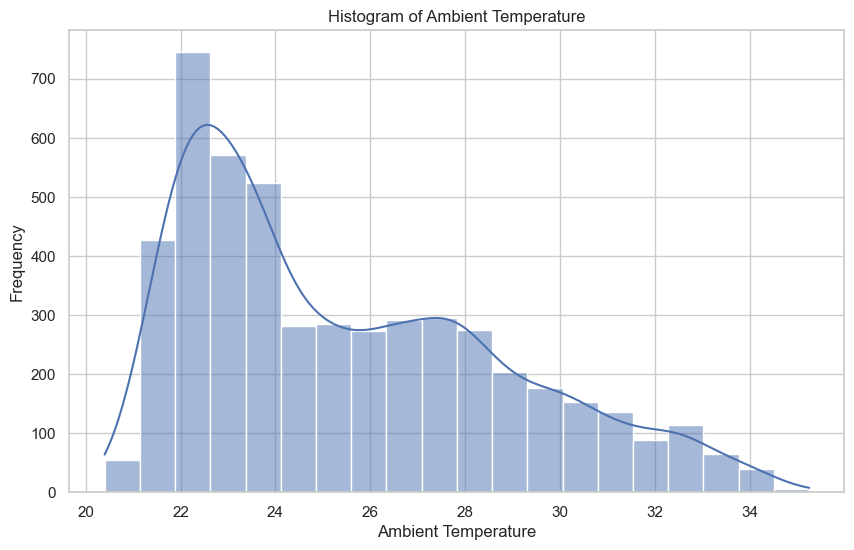

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AMBIENT_TEMPERATURE'], bins=20, kde=True)
plt.title('Histogram of Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Frequency')
plt.show()

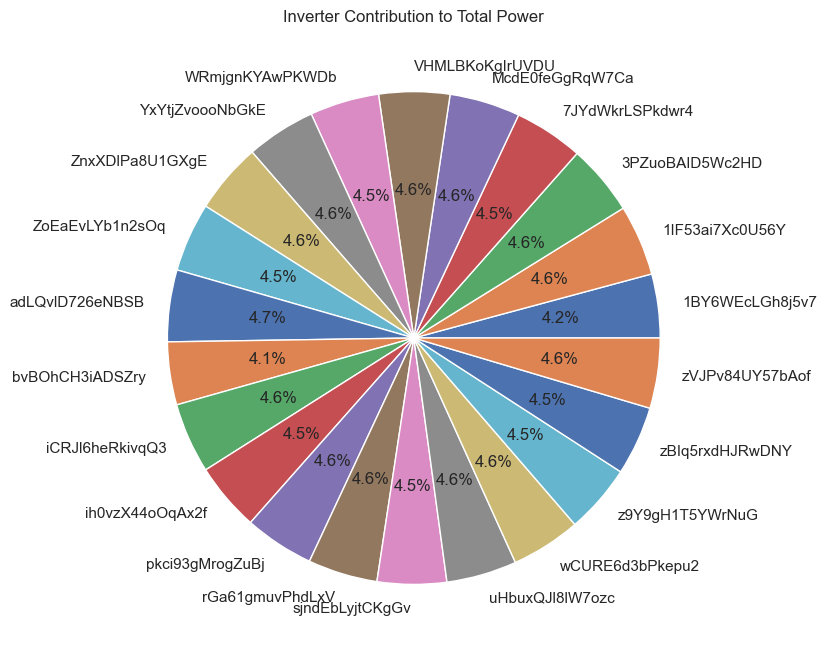

In [41]:
plt.figure(figsize=(8, 8))
total_power_by_inverter = data.groupby('SOURCE_KEY_x')['DC_POWER'].sum()
plt.pie(total_power_by_inverter, labels=total_power_by_inverter.index, autopct='%1.1f%%')
plt.title('Inverter Contribution to Total Power')
plt.show()

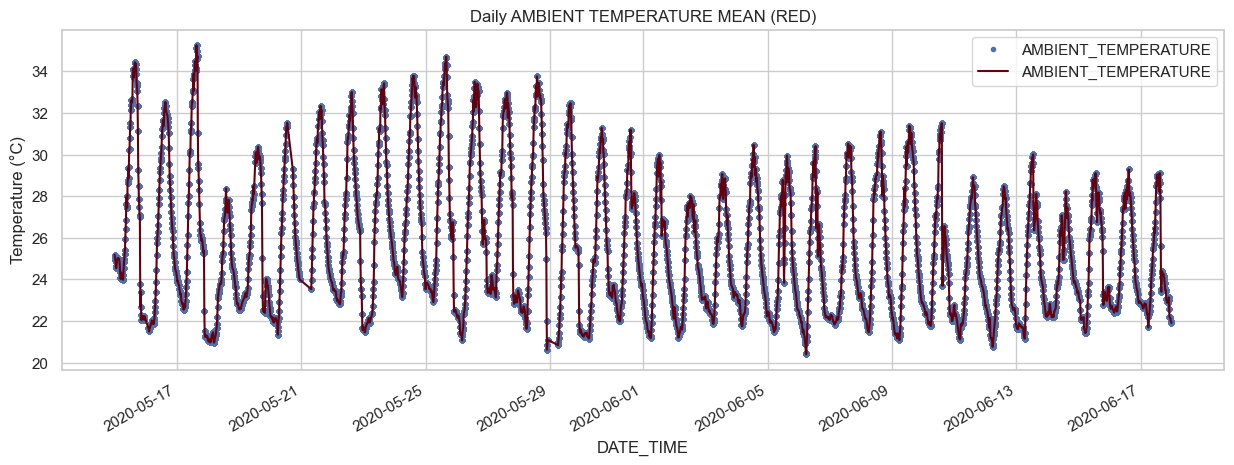

In [62]:
data.plot(x='DATE_TIME', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(15,5))
data.groupby('DATE_TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

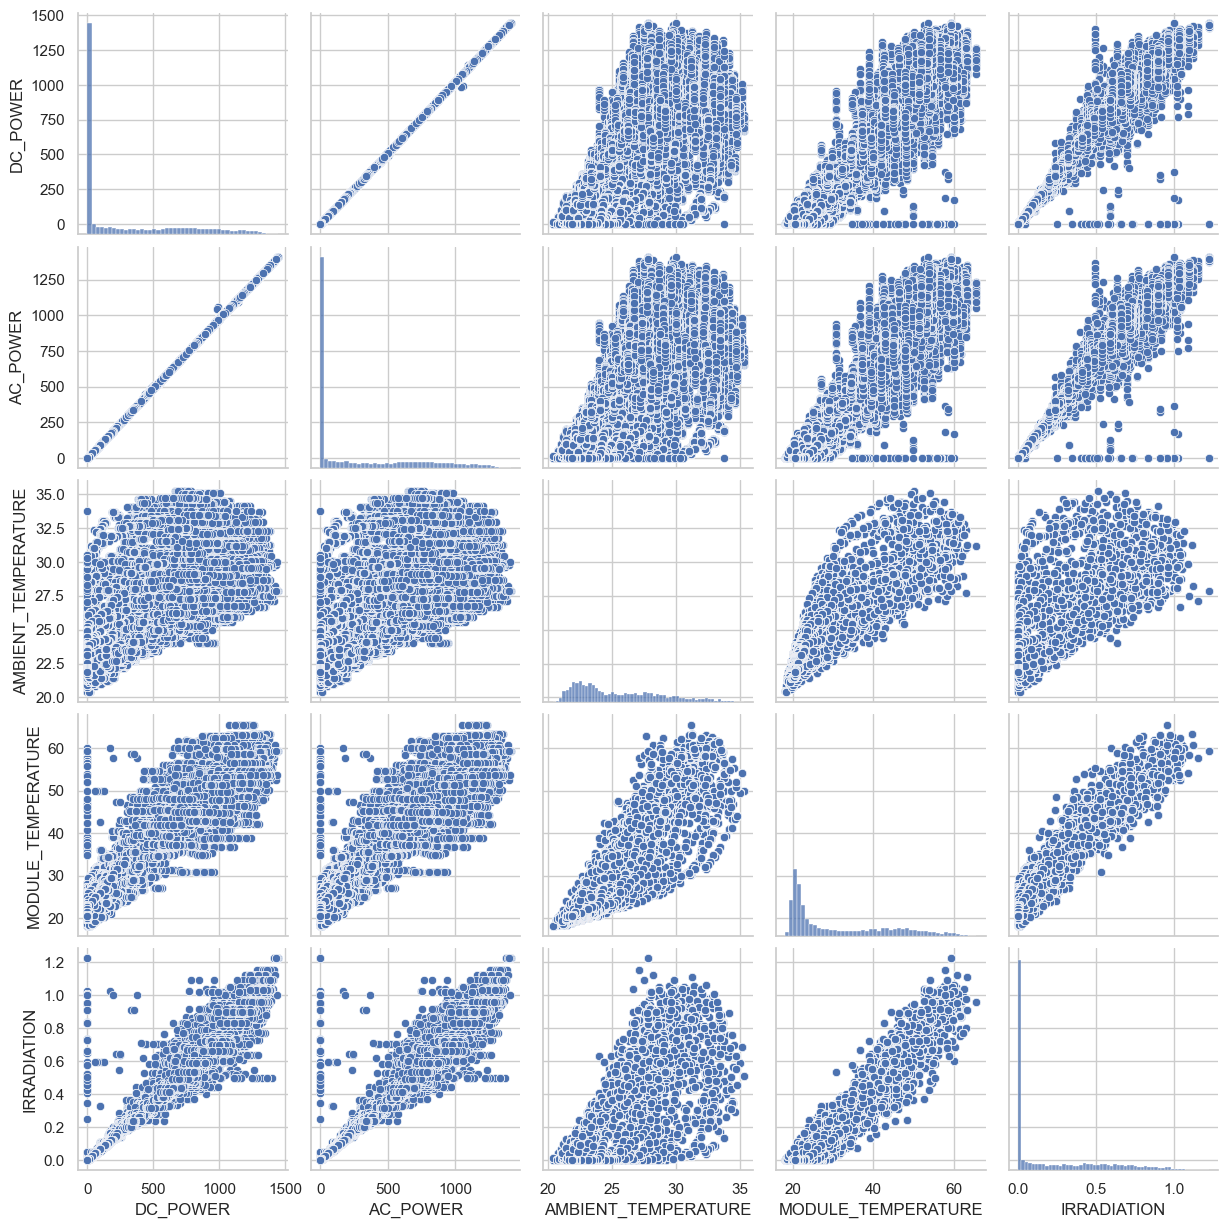

In [69]:
sns.pairplot(data.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD','PLANT_ID_x','PLANT_ID_y']))
plt.show()